In [1]:
pip install dython

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from dython.nominal import associations

In [3]:
df = pd.read_csv(r'project2.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df['Churn'] = df['Churn'].replace(['No'], '0')

In [7]:
df['Churn'] = df['Churn'].replace(['Yes'], '1')

In [8]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


In [9]:
df.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,0
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,1
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,0
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,0
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,0
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,0


In [10]:
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(df)
categorical_features

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

C:\Users\HP\anaconda3\lib\site-packages\dython\nominal.py:153: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\dython\nominal.py:153: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\dython\nominal.py:153: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\dython\nominal.py:153: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  war

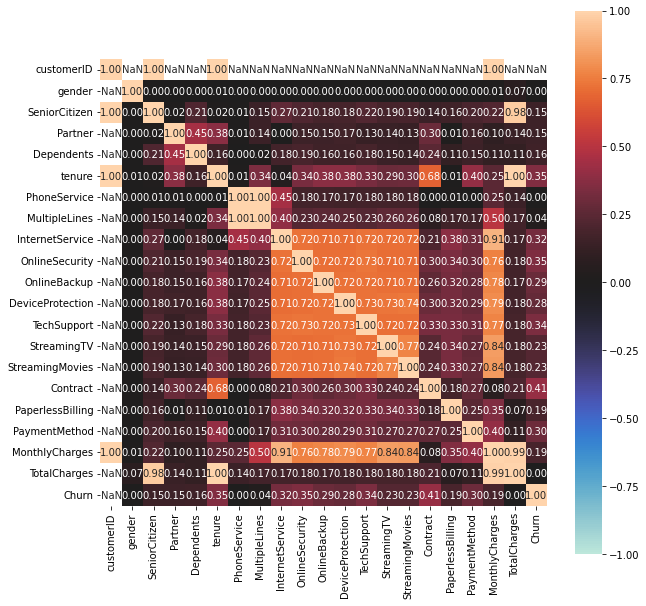

In [11]:
complete_correlation= associations(df, filename= 'complete_correlation.png', figsize=(10,10))

In [12]:
selected_column= df[categorical_features]
categorical_df = selected_column.copy()

C:\Users\HP\anaconda3\lib\site-packages\dython\nominal.py:153: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\dython\nominal.py:153: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\dython\nominal.py:153: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\dython\nominal.py:153: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  war

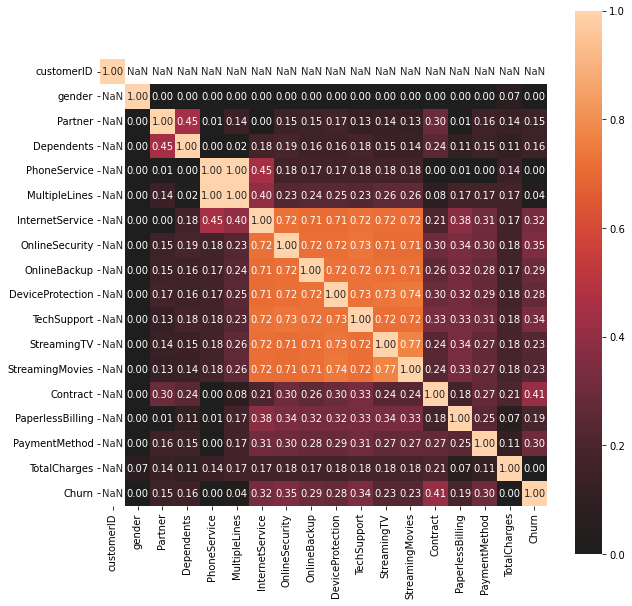

In [13]:
categorical_correlation= associations(categorical_df, filename= 'categorical_correlation.png', figsize=(10,10))

In [14]:
df1 = df.copy()
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


In [15]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


the features are target can be identified by visual inspection of the dataframe

Target Variable: The column named 'Churn' which contains whether the customer has chruned out or not.

Apart from the target, the rest of the columns are features and they can be grouped into two categories

1. Customers Demography Features
2. Customer Service offered

In [16]:
#get the summary of the df, dtype, memory usage
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
df1.shape

(7043, 21)

From the above we can clearly see that out data contains 21 columns and 7043 rows and there are no missing values in any columns and also there are three numeric columns (Namely Monthly charges, senior citizen, tenure) and the rest are categorical type

Note the data under totalcharges should be float but the datatype of this column is declared as string so this need attention, also the senior citizen column is just as lable (0-No, 1-Yes) so it should be considered as categorical data

In [18]:
#creating desruptive summary of numerical variable
df1.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [19]:
df1['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [20]:
#accessing and printing the unique values and thier count presnt in each columns
for i in df1.columns:
    print(f"Unique {i}'s count: {df1[i].nunique()}")
    print(f"[{df1[i].unique()}\n")

Unique customerID's count: 7043
[['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Unique gender's count: 2
[['Female' 'Male']

Unique SeniorCitizen's count: 2
[[0 1]

Unique Partner's count: 2
[['Yes' 'No']

Unique Dependents's count: 2
[['No' 'Yes']

Unique tenure's count: 73
[[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Unique PhoneService's count: 2
[['No' 'Yes']

Unique MultipleLines's count: 3
[['No phone service' 'No' 'Yes']

Unique InternetService's count: 3
[['DSL' 'Fiber optic' 'No']

Unique OnlineSecurity's count: 3
[['No' 'Yes' 'No internet service']

Unique OnlineBackup's count: 3
[['Yes' 'No' 'No internet service']

Unique DeviceProtection's count: 3
[['No' 'Yes' 'No internet service']

Unique TechSupport's count: 3
[['No' 'Yes' 'No internet service']

Unique 

Replacing the Churn values (No with O and Yes with 1 to change the formate of categorical data to 0 and 1 format

In [21]:
df1['Churn'] = df1['Churn'].replace(['No'], '0')
df1['Churn'] = df1['Churn'].replace(['Yes'], '1')

In [22]:
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


In [23]:
df1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Similarly for gender, partner, dependents, phone service, and paper less billing Replacing their values (No with O and Yes with 1 to change the formate of categorical data to 0 and 1 format

In [24]:
#for gender

In [25]:
df1['gender'] = df1['gender'].replace(['No'], '0')
df1['gender'] = df1['gender'].replace(['Yes'], '1')

In [26]:
# for partner

In [27]:
df1['Partner'] = df1['Partner'].replace(['No'], '0')
df1['Partner'] = df1['Partner'].replace(['Yes'], '1')

In [28]:
# for dependents

In [29]:
df1['Dependents'] = df1['Dependents'].replace(['No'], '0')
df1['Dependents'] = df1['Dependents'].replace(['Yes'], '1')

In [30]:
# for phone service

In [31]:
df1['PhoneService'] = df1['PhoneService'].replace(['No'], '0')
df1['PhoneService'] = df1['PhoneService'].replace(['Yes'], '1')

In [32]:
# for paper less billing

In [33]:
df1['PaperlessBilling'] = df1['PaperlessBilling'].replace(['No'], '0')
df1['PaperlessBilling'] = df1['PaperlessBilling'].replace(['Yes'], '1')

In [34]:
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.5,0
7039,2234-XADUH,Female,0,1,1,72,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,Female,0,1,1,11,0,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.6,1


Based on above data we can devide the dataset into two categories such as
1.Customers Demography Features
2.Customer Service offered

#Out of this we can include following features under Customers Demography Features
#1.gender
#2.Partner
#3.Dependents
#4.SeniorCitizen

In [35]:
# Similarly we can include following features under Customer Service offered
#1.'PhoneService', 
#2.'MultipleLines', 
#3.'InternetService',
#4.'OnlineSecurity', 
#5.'OnlineBackup', 
#6.'DeviceProtection', 
#7.'TechSupport',
#8.'StreamingTV', 
#9.'StreamingMovies', 
#10'Contract', 
#11.'PaperlessBilling',
#12'PaymentMethod', 
#13.'MonthlyCharges', 
#14'TotalCharges'

In [36]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'], errors ='coerce')

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [38]:
df1.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

the above analysis showed that the data contained in the totalcharges was consistent with the type conversion and hence we have got
11 missing values there, which should be dealt with (0.1%)
to remove these null values we can drop them as their percent is negligiable.

In [39]:
df1 = df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [40]:
chr_grp = df1.groupby('Churn')

In [41]:
chr_grp.first()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
Churn,,,,,,,,,,,,,,,,,,,,
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85
1,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15


In [42]:
df1.groupby('Churn').count()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
Churn,,,,,,,,,,,,,,,,,,,,
0,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163
1,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869


In [43]:
df1.groupby(['Churn','gender']).count()

customerID  SeniorCitizen  Partner  Dependents  tenure  \
Churn gender                                                           
0     Female        2544           2544     2544        2544    2544   
      Male          2619           2619     2619        2619    2619   
1     Female         939            939      939         939     939   
      Male           930            930      930         930     930   

              PhoneService  MultipleLines  InternetService  OnlineSecurity  \
Churn gender                                                                 
0     Female          2544           2544             2544            2544   
      Male            2619           2619             2619            2619   
1     Female           939            939              939             939   
      Male             930            930              930             930   

              OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
Churn gender                                                             
0     Female          2544              2544         2544         2544   
      Male            2619              2619         2619         2619   
1     Female           939               939          939          939   
      Male             930               930          930          930   

              StreamingMovies  Contract  PaperlessBilling  PaymentMethod  \
Churn gender                                                               
0     Female             2544      2544              2544           2544   
      Male               2619      2619              2619           2619   
1     Female              939       939               939            939   
      Male                930       930               930            930   

              MonthlyCharges  TotalCharges  
Churn gender                                
0     Female            2544          2544  
      Male              2619          2619  
1     Female             939           939  
      Male               930           930

In [44]:
pv = pd.pivot_table(df1,index=['Churn','gender'],values=['customerID'], aggfunc = 'count')

In [45]:
pv.rename(columns={'customerID':'no of users'})

no of users
Churn gender             
0     Female         2544
      Male           2619
1     Female          939
      Male            930

the customers who have patners have low rate of churn, so to drop the churn rate the company could offer plans for couples (min 2 packs)

In [46]:
import matplotlib.pyplot as plt

In [47]:
import numpy as np

In [48]:
%matplotlib inline #for static graph same notebook graph

UsageError: unrecognized arguments: #for static graph same notebook graph


In [50]:
#%matplotlib notebook for interactive graphs

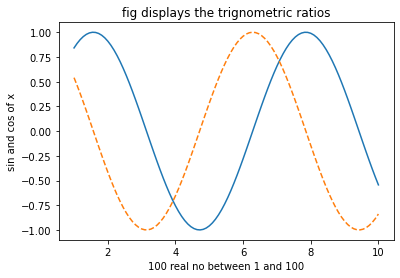

In [51]:
x = np.linspace(1,10,100)
fig = plt.figure()
plt.plot(x,np.sin(x),'-')
plt.plot(x,np.cos(x),'--')

plt.xlabel("100 real no between 1 and 100")
plt.ylabel("sin and cos of x")
plt.title("fig displays the trignometric ratios")
plt.show()

In [52]:
fig.savefig('marks of studenst.png')

In [53]:
#plt.pie
#plt.hist()
#plt.bar()
#plt.errorbar()
#plt.barh()
#plt.scatter()
#plt.plot()
#plt.contour()
#plt.stackplot()
#plt.boxplot()

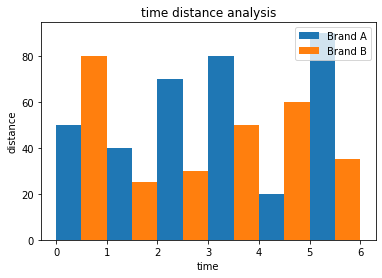

In [54]:
#bar graph

time_a = [0.25,1.25,2.25,3.25,4.25,5.25]
dist_a = [50,40,70,80,20,90]

time_b= [0.75,1.75,2.75,3.75,4.75,5.75]
dist_b = [80,25,30,50,60,35]

#plotting bar graphs
plt.bar(time_a,dist_a,label = 'Brand A', width =0.5)
plt.bar(time_b,dist_b,label = 'Brand B', width =0.5)
plt.legend()
plt.xlabel('time')
plt.ylabel('distance')
plt.title('time distance analysis')
plt.show()

(array([  6.,  15.,  54., 104., 207., 236., 194., 118.,  45.,  21.]),
 array([-3.08292261, -2.51779905, -1.95267549, -1.38755193, -0.82242837,
        -0.25730481,  0.30781875,  0.87294231,  1.43806586,  2.00318942,
         2.56831298]),
 <BarContainer object of 10 artists>)

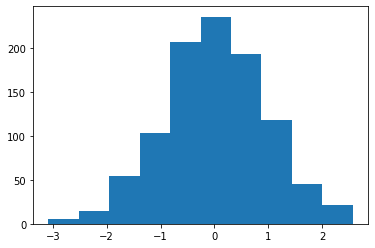

In [55]:
data = np.random.randn(1000)
plt.hist(data)

(array([0., 4., 8., 6., 1., 2., 2., 4.]),
 array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 <BarContainer object of 8 artists>)

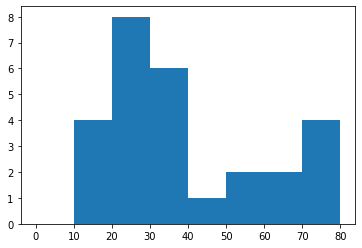

In [56]:
age = [22,23,34,21,23.5,55,62,22,22,70,12,35,31,31,35,76,40,24,54,77,34,67,20,19,18,18,77]
bins = [0,10,20,30,40,50,60,70,80]
plt.hist(age, bins)

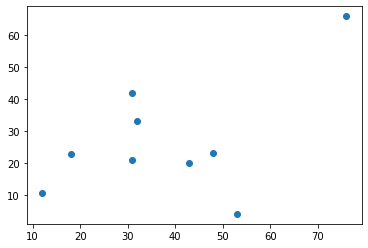

In [57]:
age1 = [12,18,31,32,76,31,53,43,48]
revenue = [10.5,22.8,42,33.2,66,21,4,20,23]
plt.scatter(age1, revenue)

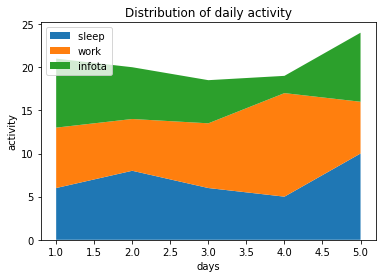

In [58]:
days = [1,2,3,4,5]

sleep= [6,8,6,5,10]
work = [7,6,7.5,12,6]
infota = [8,6,5,2,8]

labels = ["sleep ", "work", "infota"]
plt.stackplot(days, sleep, work, infota, labels=labels)

plt.xlabel('days')
plt.ylabel('activity')
plt.title('Distribution of daily activity')
plt.legend(loc='upper left')

plt.show()

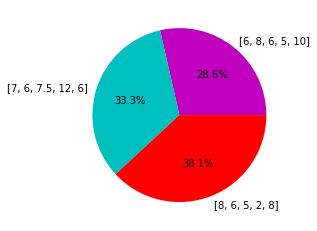

In [59]:
slices = [6,7,8]
activities = [sleep, work, infota]
col= ['m','c','r']

plt.pie(slices, labels=activities, colors =col, autopct ='%1.1f%%')

plt.show()

In [60]:
from matplotlib import style

In [61]:
df1[['tenure','Churn']].head(25)

,tenure,Churn
0,1,0
1,34,0
2,2,1
3,45,0
4,2,1
5,8,1
6,22,0
7,10,0
8,28,1
9,62,0


1. customer who stay longer on our platform tend to stick to us, ie. their churn rate is low

2. the customers having bundled plans are less likely to churn out or the cutomers with simple plan have higher chances to churned out

3. the senior citizens are less likly to churn out compared to the others

In [ ]:
x = np.
y = 

p = np.
q = 

In [67]:
import seaborn as sns

<ipython-input-79-ee001bd16130>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['tenure'], kde= False, bins=int(180/5),color='darkblue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth':5})


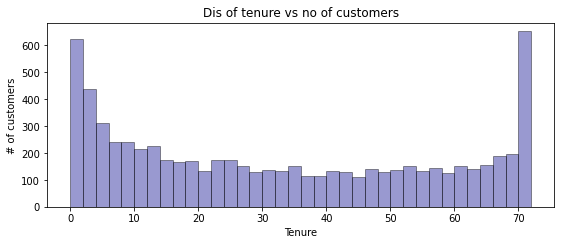

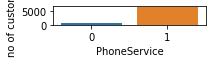

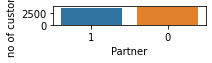

In [79]:
plt.figure(figsize = (20,40))
plt.subplot(10,2,1)

ax = sns.distplot(df['tenure'], kde= False, bins=int(180/5),color='darkblue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth':5})
plt.title('Dis of tenure vs no of customers')
ax.set_ylabel('# of customers')
ax.set_xlabel('Tenure')
plt.show()

plt.subplot(10,2,2)

ax = sns.countplot(x='PhoneService', data=df1)
ax.set_ylabel('no of customers')
plt.show()

plt.subplot(10,2,3)

ax = sns.countplot(x='Partner', data=df1)
ax.set_ylabel('no of customers')
plt.show()